In [1]:
import torch
import matplotlib.pyplot as plt

# Linear classification

## Generate some data

In [2]:
def gaussian(x0, y0, x_std, y_std, n):
    X = torch.normal(mean=torch.ones((n, 2)) * torch.tensor([x0, y0]),
                     std=torch.tensor([x_std, y_std]))
    return X

In [3]:
# First Gaussian distribution
X1 = gaussian(-0.5, 0.5, 0.15, 0.3, 100)
y1 = torch.zeros(X1.shape[0]).long()  # First category is 0

# Second distribution
X2 = gaussian(0.5, 1, 0.15, 0.3, 100)
y2 = torch.ones(X2.shape[0]).long()   # Second category is 1

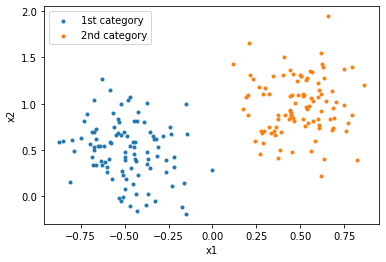

In [4]:
fig1, ax1 = plt.subplots()
ax1.scatter(X1[:, 0], X1[:, 1], marker='.', label='1st category')
ax1.scatter(X2[:, 0], X2[:, 1], marker='.', label='2nd category')
ax1.set(xlabel='x1', ylabel='x2')
ax1.legend()
plt.show()

In [5]:
X = torch.cat((X1, X2), 0)
y = torch.cat((y1, y2), 0)

print('Inputs shape:\t{}\nLabel shape:\t{}'.format(X.shape, y.shape))

Inputs shape:	torch.Size([200, 2])
Label shape:	torch.Size([200])


## Define network

In [6]:
model_simple = torch.nn.Sequential(
    # 2 input (x1, x2), 2 outputs (category index: 0, 1)
    torch.nn.Linear(2, 2),
    # Softmax activation at the output to get a probability distribution
    torch.nn.Softmax(dim=1)
    )

optimizer_simple = torch.optim.SGD(model_simple.parameters(), lr=1e-2)

In [7]:
loss_fn = torch.nn.CrossEntropyLoss()

## Training

In [8]:
def train(x, y, model, optimizer, loss_fn, epochs):
    error_list = []
    for i in range(epochs):
        y_pred = model(x)   # Forward prediction
        loss = loss_fn(y_pred, y)     # Compute the loss
        optimizer.zero_grad()   # Reinitialize the gradients
        loss.backward()
        optimizer.step()
        
        error_list.append(loss.item())
    return error_list

In [9]:
error_list = train(X, y, model_simple, optimizer_simple, loss_fn, 20000)

## Predictions

In [10]:
#Define a grid of points to make a prediction
n = 100
X1_pred, X2_pred = torch.meshgrid(torch.linspace(-2, 2, n),
                                  torch.linspace(-2, 2, n))

# Shape the tensor properly for prediction
X_pred = torch.stack([X1_pred.reshape(-1), X2_pred.reshape(-1)], 1)

In [11]:
# Predictions
y_pred = model_simple(X_pred)

# Shape again for contourf
y_pred_plot = y_pred[:, 0].reshape((n, n))
# Proper format for contourf
y_pred_plot = y_pred_plot.detach()

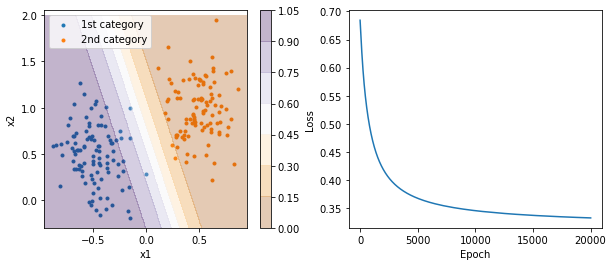

In [12]:
fig2, axs2 = plt.subplots(1, 2, figsize=(10, 4))

# Show the learned parameters
axs2[0].scatter(X1[:, 0], X1[:, 1], marker='.', label='1st category')
axs2[0].scatter(X2[:, 0], X2[:, 1], marker='.', label='2nd category')
im = axs2[0].contourf(X1_pred, X2_pred, y_pred_plot,
                      cmap="PuOr", alpha=0.3, vmin=0, vmax=1)
axs2[0].set(xlabel='x1', ylabel='x2',
           xlim=ax1.get_xlim(), ylim=ax1.get_ylim())
axs2[0].legend()

# Training error
axs2[1].plot(error_list)
axs2[1].set(xlabel='Epoch', ylabel='Loss')

fig2.colorbar(im, ax=axs2[0])
plt.show()

# General classification

## Problem with previous approach

In [13]:
# First Gaussian distribution: x=(-1,-1), y=0
X1_xor = gaussian(-1, -1, 0.1, 0.1, 100)
y1_xor = torch.zeros(X1_xor.shape[0]).long()     # First category is 0

# Second distribution: x=(1,1), y=0
X2_xor = gaussian(1, 1, 0.1, 0.1, 100)
y2_xor = torch.zeros(X2_xor.shape[0]).long()  # First category is 0

# Third distribution: x=(-1,1), y=1
X3_xor = gaussian(-1, 1, 0.1, 0.1, 100)
y3_xor = torch.ones(X3_xor.shape[0]).long()  # Second category is 1

# Fourth distribution: x=(1,-1), y=1
X4_xor = gaussian(1, -1, 0.1, 0.1, 100)
y4_xor = torch.ones(X4_xor.shape[0]).long()  # First category is 1

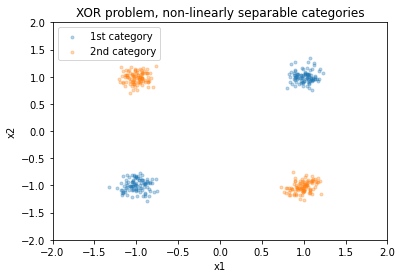

In [14]:
fig3, ax3 = plt.subplots()

# Scatter plot of first category
ax3.scatter(torch.cat([X1_xor[:, 0], X2_xor[:, 0]]),
            torch.cat([X1_xor[:, 1], X2_xor[:, 1]]),
            marker='.', alpha=0.3, label='1st category')
# Scatter plot of second category
ax3.scatter(torch.cat([X3_xor[:, 0], X4_xor[:, 0]]),
            torch.cat([X3_xor[:, 1], X4_xor[:, 1]]),
            marker='.', alpha=0.3, label='2nd category')

ax3.set(xlabel='x1', ylabel='x2', xlim=[-2, 2], ylim=[-2, 2],
        title='XOR problem, non-linearly separable categories')
ax3.legend()
plt.show()

In [15]:
X_xor = torch.cat((X1_xor, X2_xor, X3_xor, X4_xor), 0)
y_xor = torch.cat((y1_xor, y2_xor, y3_xor, y4_xor), 0)

In [16]:
error_list2 = train(X_xor, y_xor,
                    model_simple, optimizer_simple, loss_fn, 10000)

In [17]:
y_pred = model_simple(X_pred)

# Shape again for contourf
y_pred_plot = y_pred[:, 0].reshape((n, n))
y_pred_plot = y_pred_plot.detach().numpy()

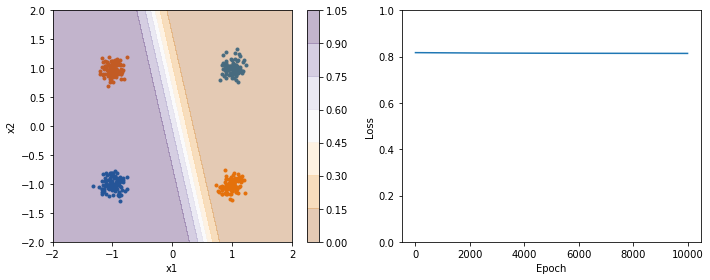

In [25]:
fig4, axs4 = plt.subplots(1, 2, figsize=(10, 4))

# Learned boundary
axs4[0].scatter(torch.cat([X1_xor[:, 0], X2_xor[:, 0]]),
                torch.cat([X1_xor[:, 1], X2_xor[:, 1]]), marker='.')
axs4[0].scatter(torch.cat([X3_xor[:, 0], X4_xor[:, 0]]),
                torch.cat([X3_xor[:, 1], X4_xor[:, 1]]), marker='.')
im = axs4[0].contourf(X1_pred, X2_pred, y_pred_plot,
                      cmap="PuOr", alpha=0.3, vmin=0, vmax=1)
axs4[0].set(xlabel='x1', ylabel='x2')
fig4.colorbar(im, ax=axs4[0])

# Training error
axs4[1].plot(error_list2)
axs4[1].set(xlabel='Epoch', ylabel='Loss', ylim=[0, 1])

fig4.tight_layout()
plt.show()

## A more general network

In [31]:
model_general = torch.nn.Sequential(
    torch.nn.Linear(2, 30),     # 2 inputs, 30 neurons
    torch.nn.ReLU(),            # Non-linear activation
    torch.nn.Linear(30, 2),     # 2 outputs, one for each possible category
    torch.nn.Softmax(dim=1)     # Softmax output to get a probability distribution
    )

optimizer_general = torch.optim.SGD(model_general.parameters(), lr=1e-2)

In [32]:
error_list3 = train(X_xor, y_xor,
                    model_general, optimizer_general, loss_fn, 10000)

In [33]:
y_pred = model_general(X_pred)

# Shape again for contourf
y_pred_plot = y_pred[:, 0].reshape((n, n))
y_pred_plot = y_pred_plot.detach().numpy()

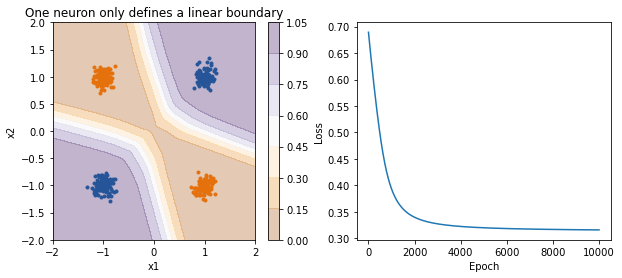

In [34]:
fig5, axs5 = plt.subplots(1, 2, figsize=(10, 4))

# Scatter plot of first category
axs5[0].scatter(torch.cat([X1_xor[:, 0], X2_xor[:, 0]]),
                torch.cat([X1_xor[:, 1], X2_xor[:, 1]]), marker='.')
# Scatter plot of second category
axs5[0].scatter(torch.cat([X3_xor[:, 0], X4_xor[:, 0]]),
            torch.cat([X3_xor[:, 1], X4_xor[:, 1]]), marker='.')

im = axs5[0].contourf(X1_pred, X2_pred, y_pred_plot,
                      cmap="PuOr", alpha=0.3, vmin=0, vmax=1)
axs5[0].set(xlabel='x1', ylabel='x2',
            title='One neuron only defines a linear boundary')
fig5.colorbar(im, ax=axs5[0])

# Training error
axs5[1].plot(error_list3)
axs5[1].set(xlabel='Epoch', ylabel='Loss')

plt.show()

# Bonus;